In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

In [2]:
df_train = pd.read_csv("../data/df_train.csv")
df_test = pd.read_csv("../data/df_test.csv")

# 결측값 확인

In [3]:
df_train.isnull().sum()

사망자수               0
중상자수               0
경상자수               0
부상자수               0
주말                 0
평일                 0
눈                  0
맑음                 0
비                  0
흐림                 0
남구                 0
달서구                0
달성군                0
동구                 0
북구                 0
서구                 0
수성구                0
중구                 0
교차로 - 교차로부근        0
교차로 - 교차로안         0
교차로 - 교차로횡단보도내     0
단일로 - 고가도로위        0
단일로 - 교량           0
단일로 - 기타           0
단일로 - 지하차도(도로)내    0
단일로 - 터널           0
주차장 - 주차장          0
건조                 0
서리/결빙              0
적설                 0
젖음/습기              0
침수                 0
차대사람               0
차대차                0
차량단독               0
dtype: int64

In [4]:
df_test.isnull().sum()

주말                 0
평일                 0
눈                  0
맑음                 0
비                  0
흐림                 0
남구                 0
달서구                0
달성군                0
동구                 0
북구                 0
서구                 0
수성구                0
중구                 0
교차로 - 교차로부근        0
교차로 - 교차로안         0
교차로 - 교차로횡단보도내     0
단일로 - 고가도로위        0
단일로 - 교량           0
단일로 - 기타           0
단일로 - 지하차도(도로)내    0
단일로 - 터널           0
주차장 - 주차장          0
건조                 0
서리/결빙              0
적설                 0
젖음/습기              0
침수                 0
차대사람               0
차대차                0
차량단독               0
dtype: int64

# 데이터 분포 확인
    - 전부 0 or 1 인 데이터

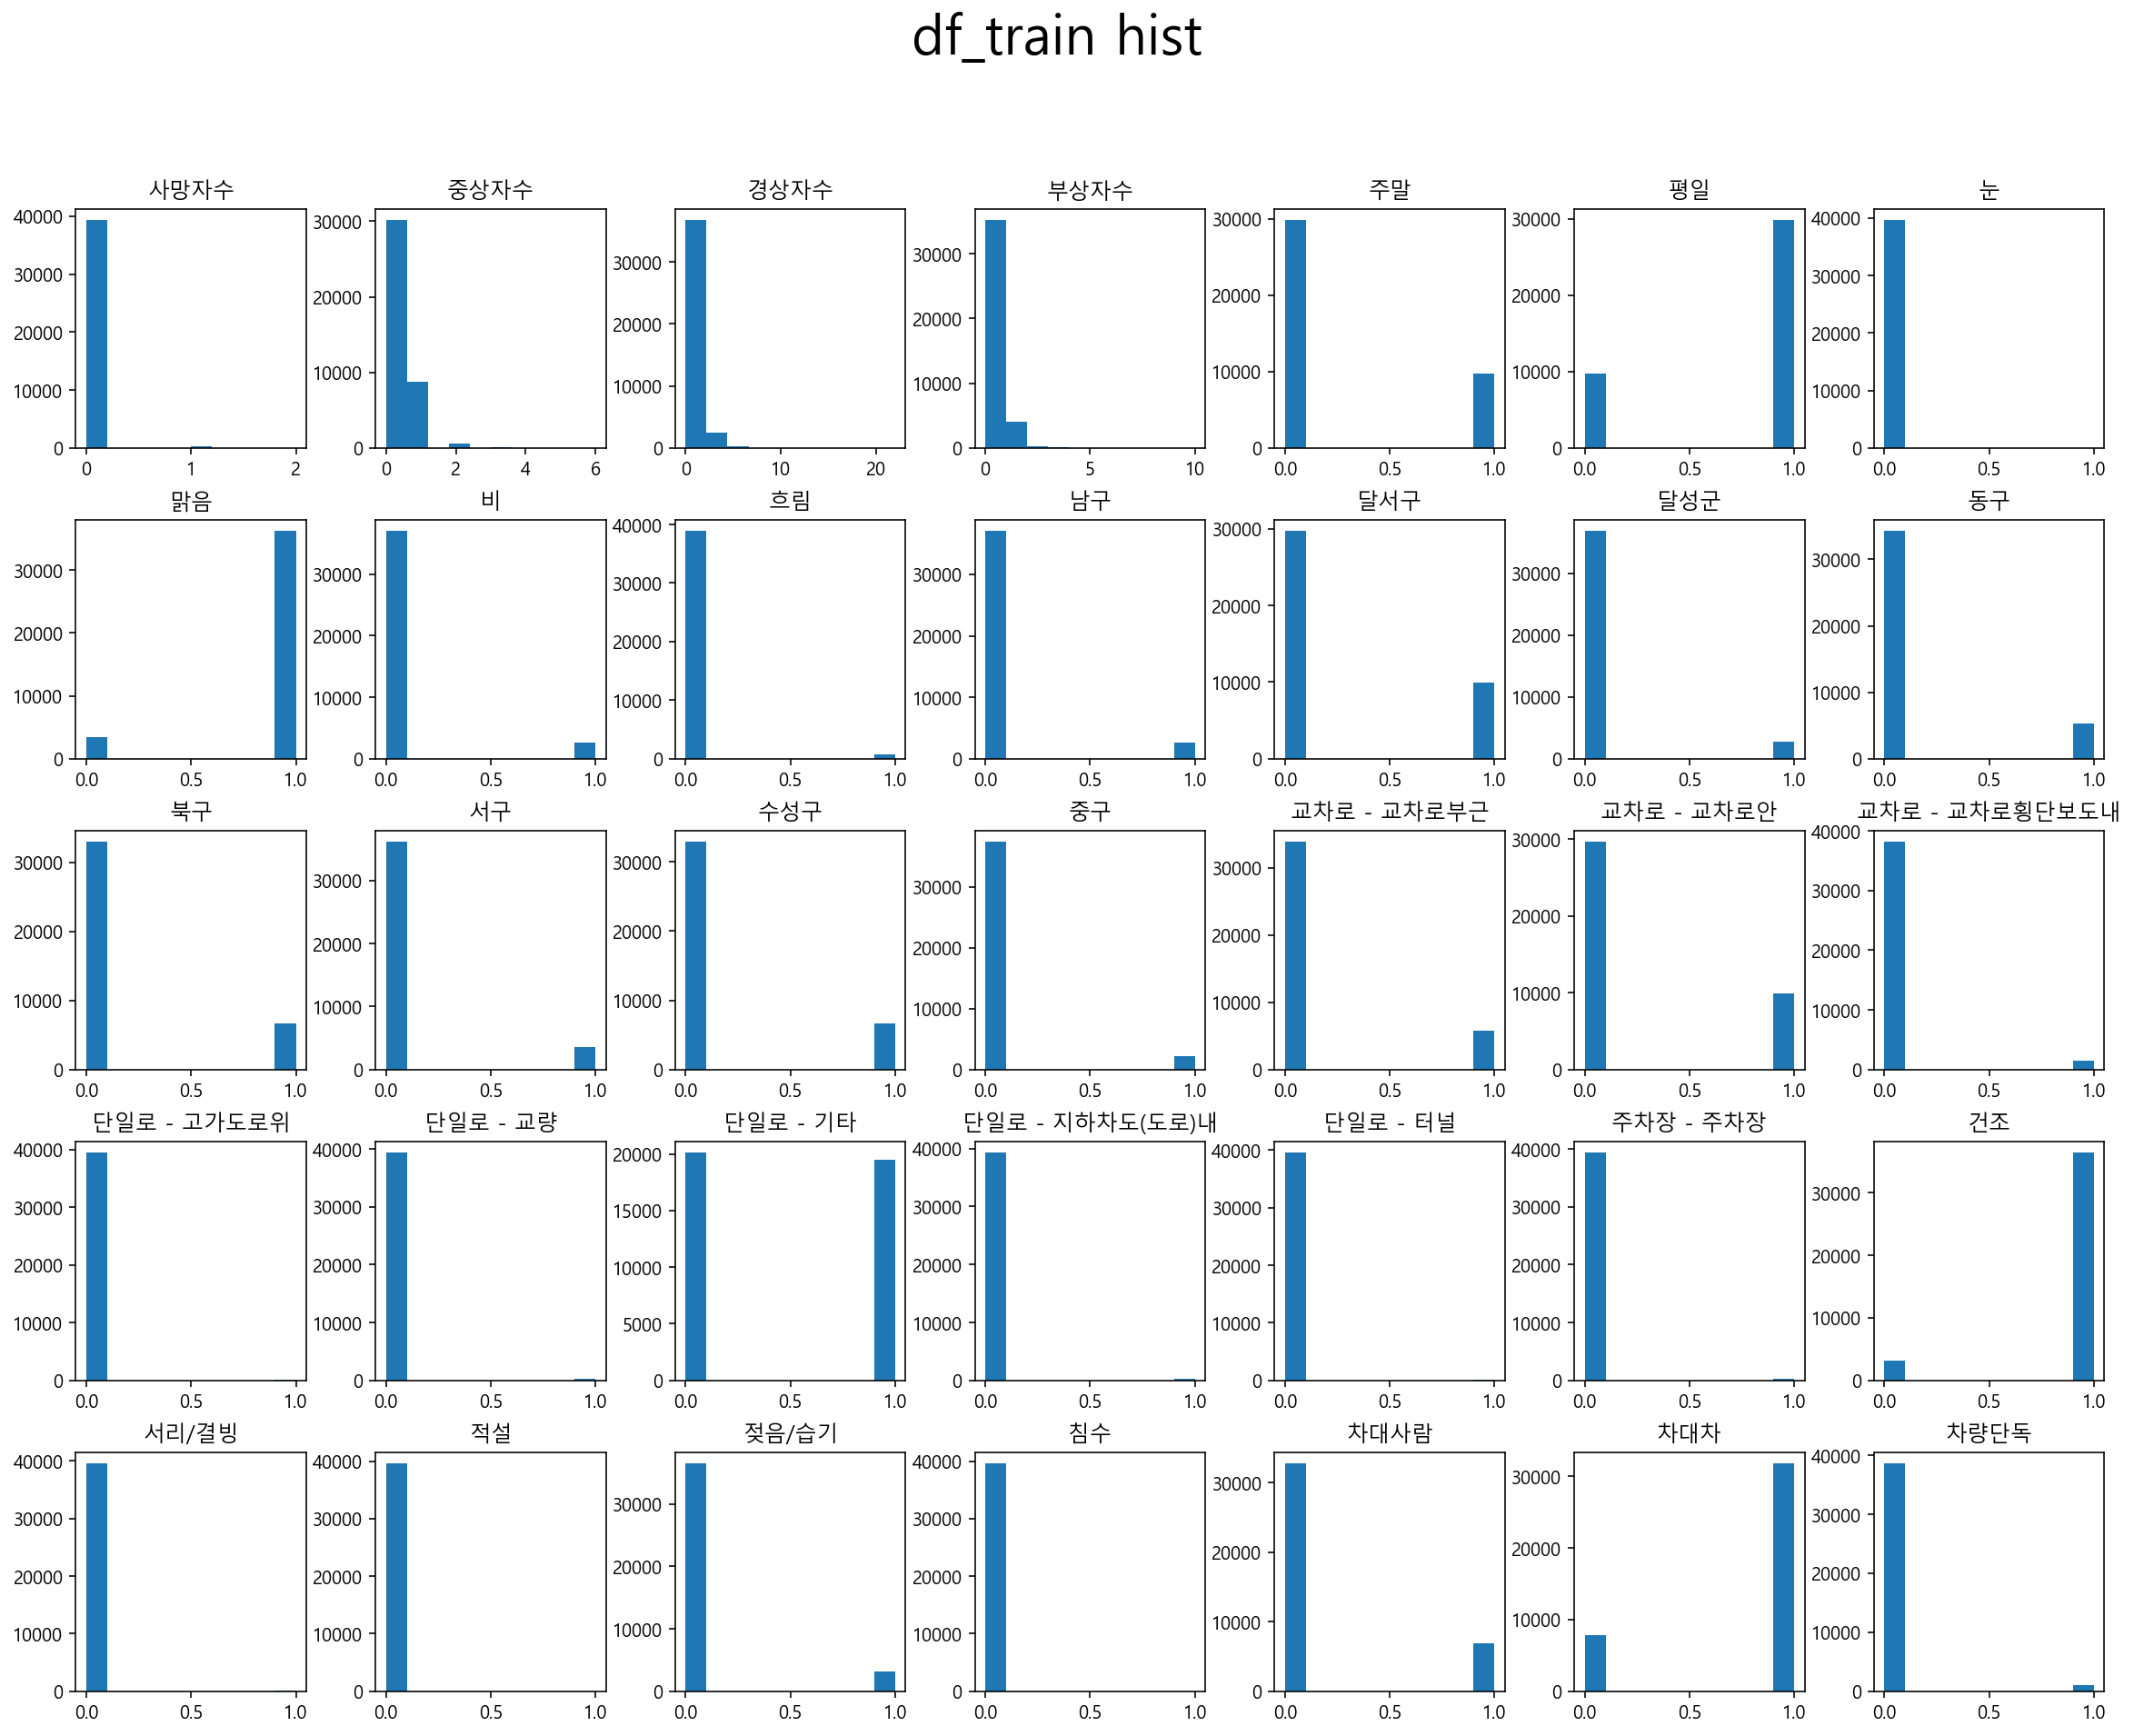

In [5]:
f, axes = plt.subplots(5, 7)
f.set_size_inches((20, 15))  # 격자 크기 설정
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 격자 여백 설정
f.suptitle('df_train hist', fontsize=30)

k = 0

for i in range(5):
    for j in range(7):
        axes[i, j].hist(df_train.iloc[:, k])
        axes[i, j].set_title(df_train.columns[k])
        k += 1

plt.show()

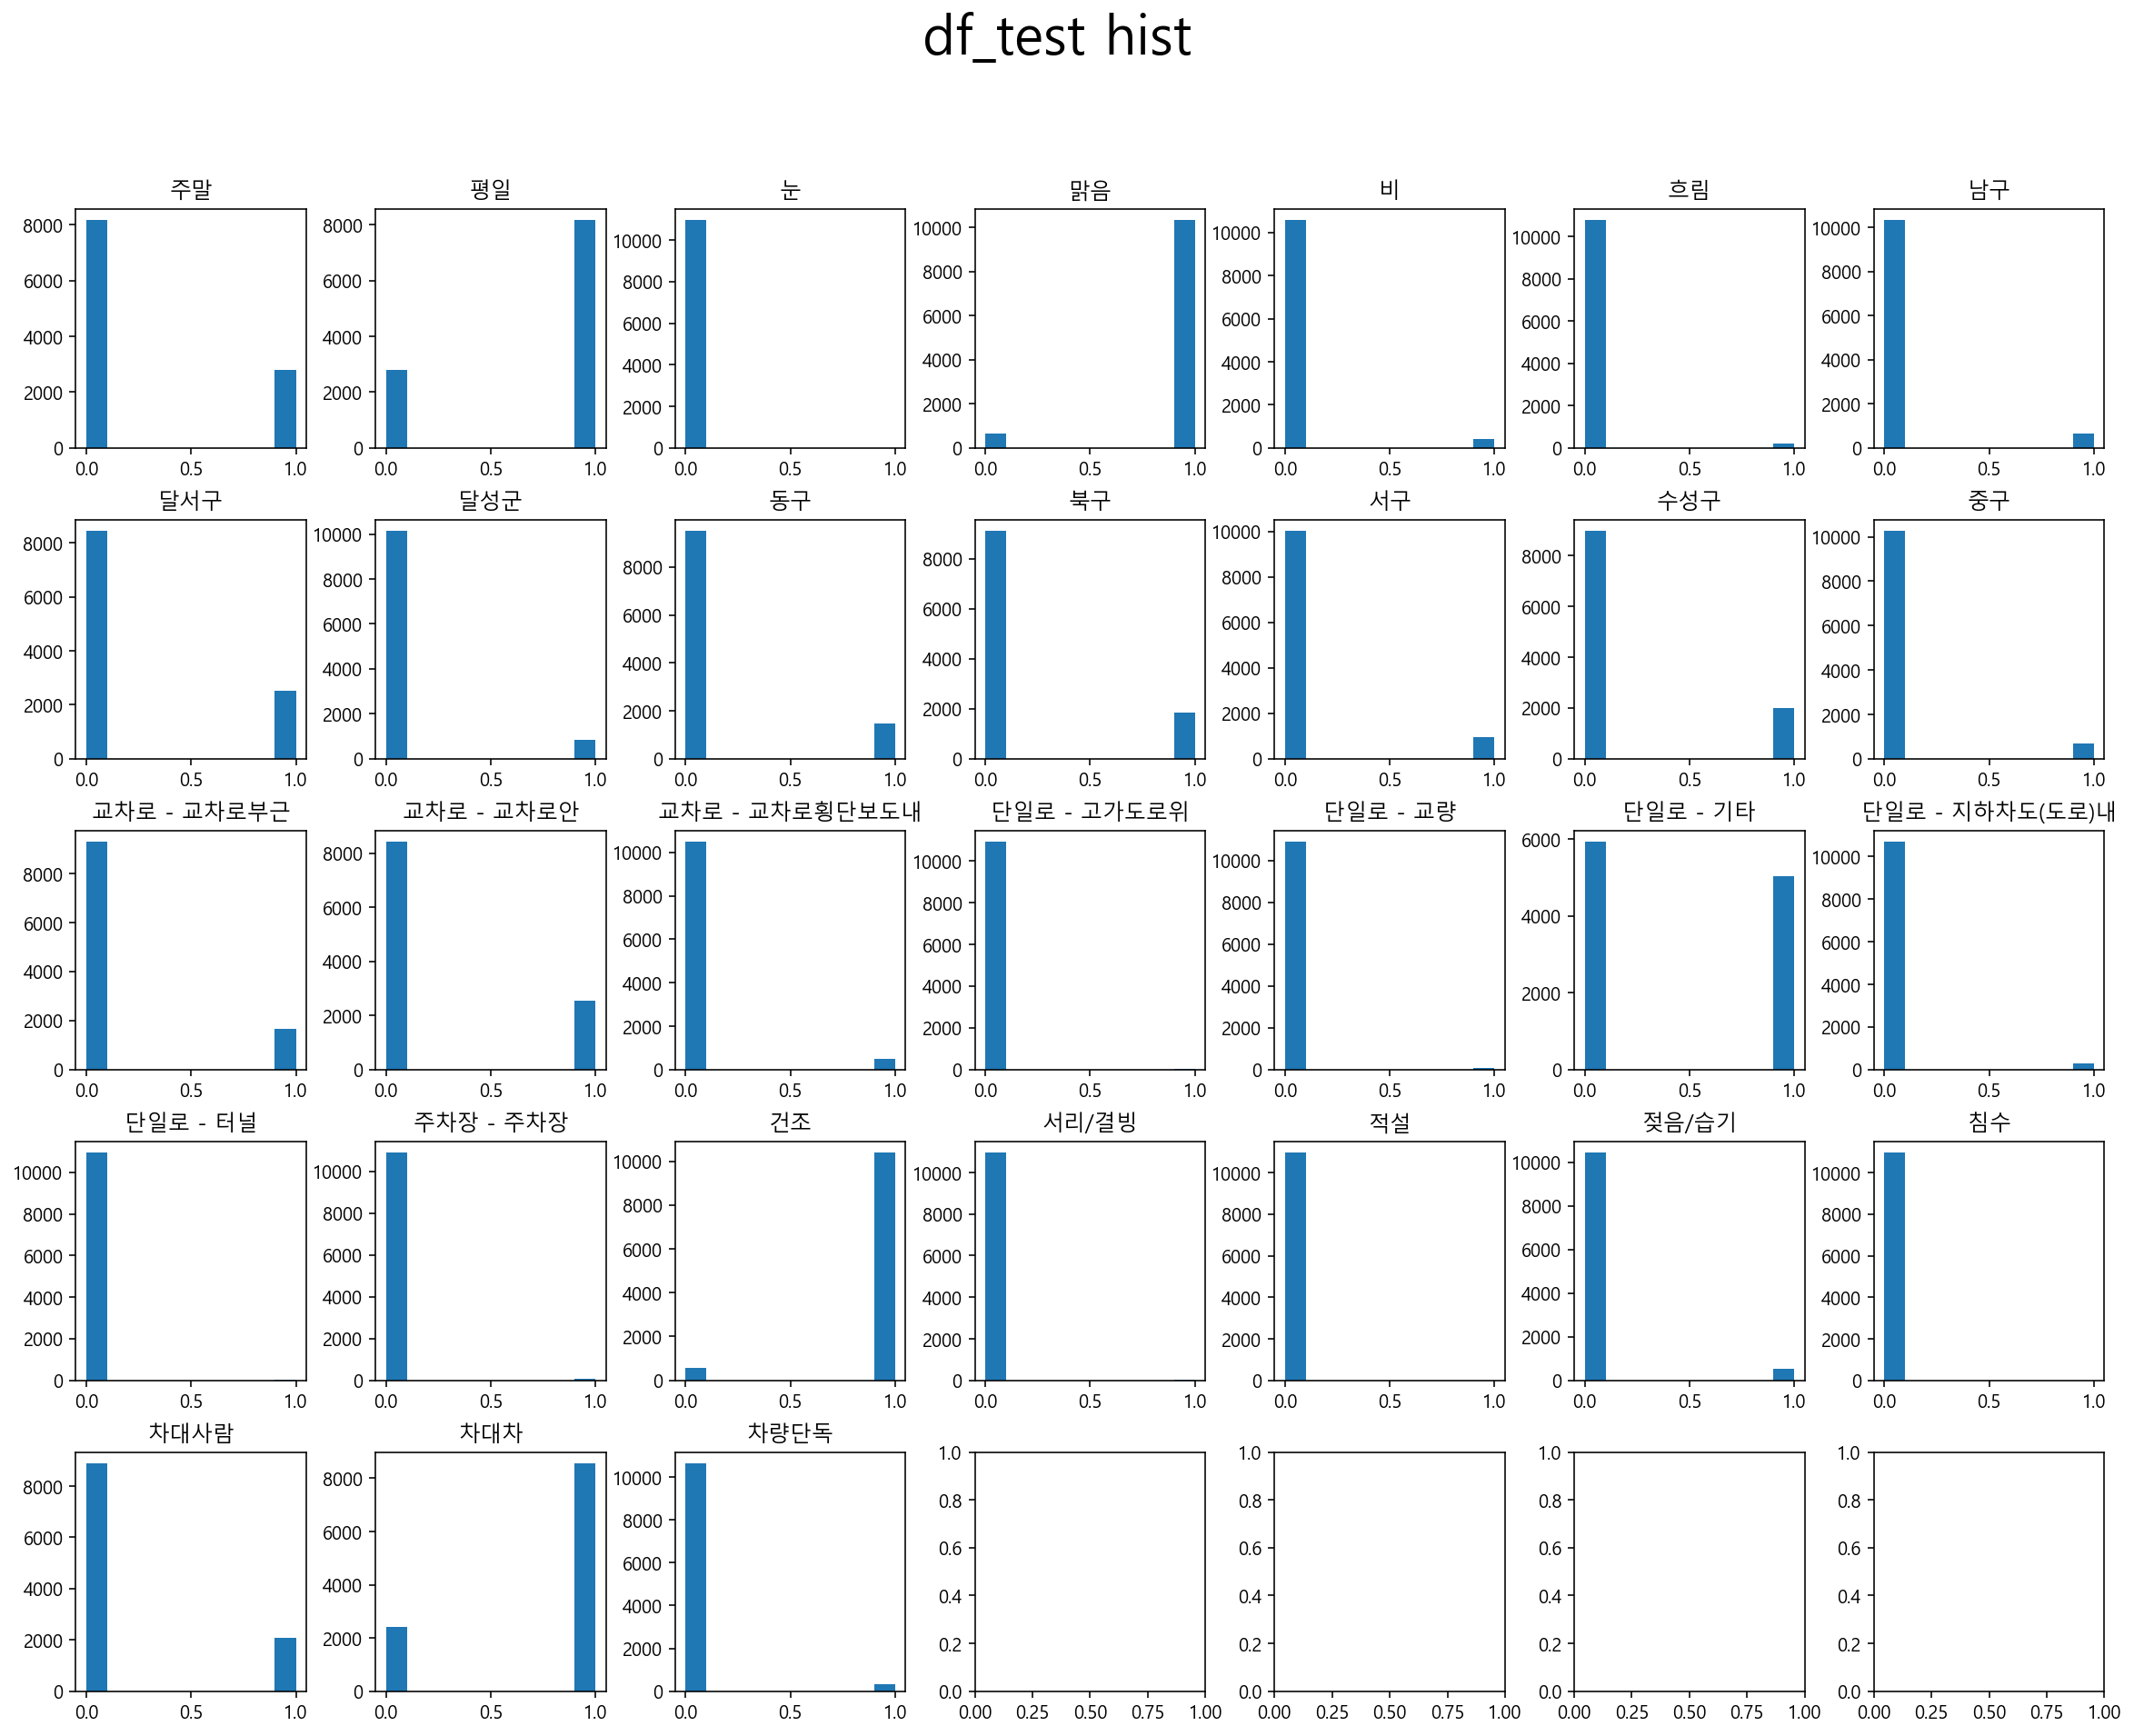

In [6]:
f, axes = plt.subplots(5, 7)
f.set_size_inches((20, 15))  # 격자 크기 설정
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 격자 여백 설정
f.suptitle('df_test hist', fontsize=30)

k = 0


for i in range(5):
    for j in range(7):
        axes[i, j].hist(df_test.iloc[:, k])
        axes[i, j].set_title(df_test.columns[k])
        k += 1

        if k == 31:
            break

plt.show()

# 분석

※ ECLO(Equivalent Casualty Loss Only) : 인명피해 심각도

ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1

## 분석하기 전 데이터 전처리

In [7]:
df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']

<AxesSubplot:>

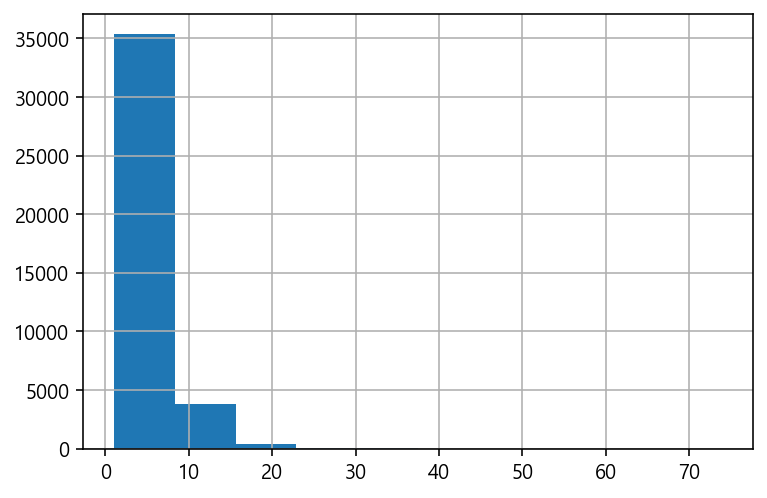

In [9]:
df_train['target'].hist()

In [10]:
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

## train_test_split

In [13]:
X = df_train.drop(columns = 'target',axis=1)
y = df_train['target']

In [14]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

## 다중회귀

In [18]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [23]:
mlr.score(x_train, y_train)

0.027057732374168975

In [24]:
mlr.score(x_test, y_test)

0.025213690906573882